In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, SimpleRNN, BatchNormalization
from keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar y explorar el dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

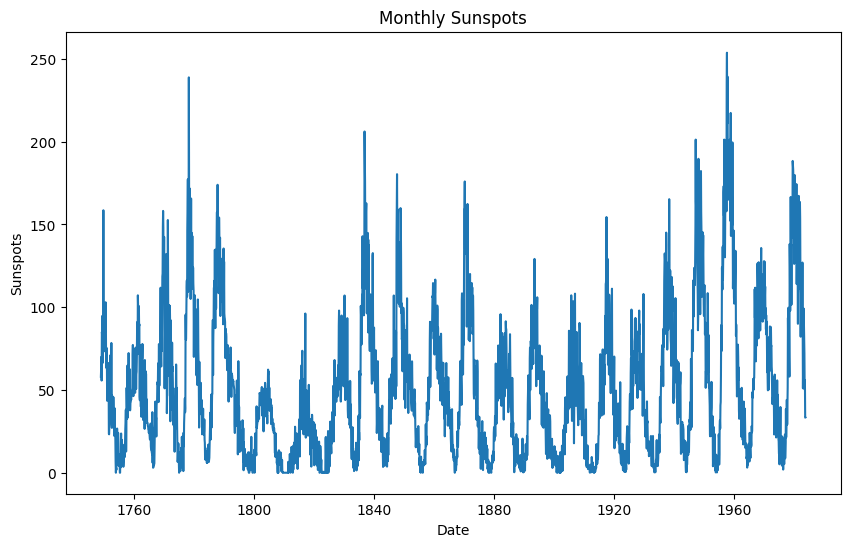

In [3]:
# Visualizar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(df['Sunspots'])
plt.title('Monthly Sunspots')
plt.xlabel('Date')
plt.ylabel('Sunspots')
plt.show()

In [4]:
# Normalización de los datos
data = df['Sunspots'].values
data = (data - np.mean(data)) / np.std(data)

In [5]:
# Preparar secuencias de entrada y salida
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(data, seq_length)

In [6]:
# Dividir en conjuntos de entrenamiento y prueba
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [7]:
# Redimensionar para que se ajuste a la entrada de la RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## Feed Forward NN

In [8]:
# Crear el modelo Feed Forward NN
ffnn_model = Sequential([
    Dense(50, activation='relu', input_shape=(seq_length,)),
    BatchNormalization(),
    Dense(50, activation='relu'),
    Dense(1)
])

C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compilar el modelo
ffnn_model.compile(optimizer='adam', loss='mse')

In [10]:
# Entrenar el modelo
ffnn_history = ffnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.8322 - val_loss: 1.0280
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2369 - val_loss: 0.6771
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1874 - val_loss: 0.4220
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1560 - val_loss: 0.3474
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1511 - val_loss: 0.3287
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1479 - val_loss: 0.2245
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1458 - val_loss: 0.2635
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1487 - val_loss: 0.2424
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1456 - val_loss: 0.2215
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1495 - val_loss: 0.2218
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1407 - val_loss: 0.2485
Epoch 12/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1341 - val_lo

In [11]:
# Evaluar el modelo
ffnn_loss = ffnn_model.evaluate(X_test, y_test)
print(f'Feed Forward NN Loss: {ffnn_loss}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3200 
Feed Forward NN Loss: 0.3214634358882904


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


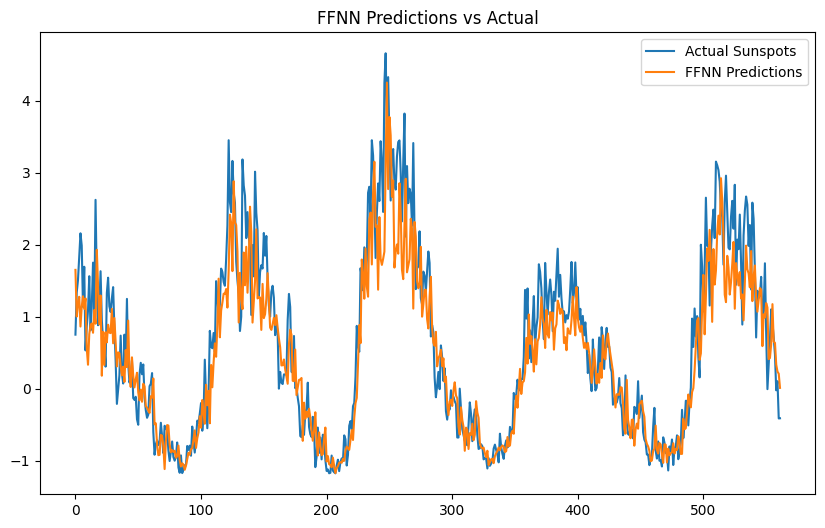

In [12]:
# Predicciones y visualización
ffnn_predictions = ffnn_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Sunspots')
plt.plot(ffnn_predictions, label='FFNN Predictions')
plt.legend()
plt.title('FFNN Predictions vs Actual')
plt.show()

## Red Neuronal Recurrente (RNN)

In [13]:
# Crear el modelo RNN
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    BatchNormalization(),
    Dense(1)
])

C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Compilar el modelo
rnn_model.compile(optimizer='adam', loss='mse')

In [15]:
# Entrenar el modelo
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.4411 - val_loss: 1.3546
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1603 - val_loss: 0.9455
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1551 - val_loss: 0.7067
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1370 - val_loss: 0.4335
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1557 - val_loss: 0.5576
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1438 - val_loss: 0.2130
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1364 - val_loss: 0.2650
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1333 - val_loss: 0.2139
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1602 - val_loss: 0.2143
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1501 - val_loss: 0.2011
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1377 - val_loss: 0.2413
Epoch 12/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1393 - val_l

In [16]:
# Evaluar el modelo
rnn_loss = rnn_model.evaluate(X_test_rnn, y_test)
print(f'RNN Loss: {rnn_loss}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2650 
RNN Loss: 0.24620354175567627


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


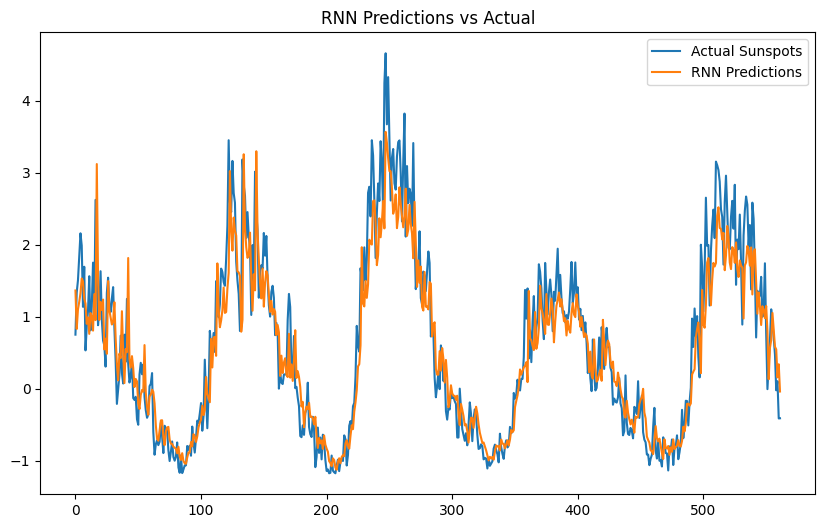

In [17]:
# Predicciones y visualización
rnn_predictions = rnn_model.predict(X_test_rnn)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Sunspots')
plt.plot(rnn_predictions, label='RNN Predictions')
plt.legend()
plt.title('RNN Predictions vs Actual')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcular RMSE para Feed Forward NN
ffnn_rmse = np.sqrt(mean_squared_error(y_test, ffnn_predictions))
print(f'Feed Forward NN RMSE: {ffnn_rmse}')

# Calcular RMSE para RNN
rnn_rmse = np.sqrt(mean_squared_error(y_test, rnn_predictions))
print(f'RNN RMSE: {rnn_rmse}')


Feed Forward NN RMSE: 0.5669774538619416
RNN RMSE: 0.49618903499810213


In [19]:
from sklearn.metrics import mean_absolute_error

# Calcular MAE para Feed Forward NN
ffnn_mae = mean_absolute_error(y_test, ffnn_predictions)
print(f'Feed Forward NN MAE: {ffnn_mae}')

# Calcular MAE para RNN
rnn_mae = mean_absolute_error(y_test, rnn_predictions)
print(f'RNN MAE: {rnn_mae}')


Feed Forward NN MAE: 0.4065460272296852
RNN MAE: 0.35914492980890944
